In [ ]:
import json
import matplotlib.pyplot as plt

In [ ]:

with open("../eval/roberta_cmp.json", "r") as f:
    roberta_results = json.load(f)
roberta_results

In [ ]:
sorted_by_support = list(map(lambda x: x[0], sorted(roberta_results.items(), key=lambda e: e[1]["f1-score"]["support"], reverse=True)))
sorted_by_support

In [ ]:
fig = plt.figure(figsize=(15, 10))

y = list(map(lambda c: roberta_results[c]["f1-score"]["delta"], sorted_by_support))

plt.bar(sorted_by_support, y)
for i, value in enumerate(y):
    plt.annotate(
        roberta_results[sorted_by_support[i]]["f1-score"]["support"],
        (sorted_by_support[i], value),
        xytext=(0, 10),
        textcoords="offset pixels"
)

plt.xticks(sorted_by_support, rotation=45)

In [ ]:
def showcase_results(results):
    x = list(map(lambda x: x[0], sorted(results.items(), key=lambda e: e[1]["support"], reverse=True)))
    y = list(map(lambda c: results[c]["metrics"]["f1-score"]["delta"], x))
    print(f"{len(x) = }")
    print(f"{len(y) = }")
    fig = plt.figure(figsize=(15, 10))
    plt.bar(x, y)
    for i, value in enumerate(y):
        plt.annotate(
            results[x[i]]["support"],
            (x[i], value),
            xytext=(-10, 10),
            textcoords="offset pixels"
        )
    fig.autofmt_xdate()


In [ ]:
with open("../eval/svm_cmp_withtitle.json", "r") as f:
    svm_results = json.load(f)

showcase_results(svm_results)

In [79]:
import os

def extract_scores(path_to_scores_dir: str):
    score_paths = os.listdir(path_to_scores_dir)
    scores = {}

    for score_path in score_paths:
        with open(os.path.join(path_to_scores_dir, score_path), "r") as f:
            this_score = json.load(f)
            scores[score_path] = this_score["test_score"]
            print(f"Loaded {score_path}")

    print(f"Successfully loaded {len(scores)} scores.")
    return scores


In [80]:
bart_large_scores = extract_scores("../scores/bart-large-cnn")
bart_large_scores

Loaded train_all_aug.bart_large_cnn.greedy.notitle.subsample_all.spacytitle.json
Loaded train_all_aug.bart_large_cnn.beam.title.nbeans_10.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.beam.notitle.nbeans_10.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.contrastive.alpha_0_6.notitle.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_p.p_0_95.title.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.top_p.p_0_95.notitle.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.notitle.subsample_all.spacytitle.json
Loaded train_all_aug.bart_large_cnn.contrastive.alpha_0_6.title.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_all.spacyti

{'train_all_aug.bart_large_cnn.greedy.notitle.subsample_all.spacytitle.json': [0.8700194488768395,
  0.9063653759742952,
  0.9297613014055969,
  0.9461029957409551,
  0.943326151403498],
 'train_all_aug.bart_large_cnn.beam.title.nbeans_10.subsample_all.spacynotitle.json': [0.8557603007165784,
  0.8843794202270298,
  0.90656534776926,
  0.9213010748058683,
  0.9280214506047517],
 'train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_all.spacynotitle.json': [0.8255614781133042,
  0.7868269074119394,
  0.820804073507203,
  0.8417838968183883,
  0.8532751431009972],
 'train_all_aug.bart_large_cnn.beam.notitle.nbeans_10.subsample_all.spacynotitle.json': [0.8667426293333441,
  0.8849118327710827,
  0.8996507109446785,
  0.9192062298038909,
  0.9239487848046092],
 'train_all_aug.bart_large_cnn.contrastive.alpha_0_6.notitle.subsample_one_per_source.spacytitle.json': [0.892907793461532,
  0.9207482283626751,
  0.935355792530549,
  0.9483937839136187,
  0.9407055953844458],
 'train_all_aug.b

In [81]:
import numpy as np

def compute_stats(scores):
    for score_path, score_values in scores.items():
        scores[score_path] = {
            "score": score_values,
            "mean": np.mean(score_values),
            "std": np.std(score_values)
        }

    return scores

In [82]:
bart_large_scores = compute_stats(bart_large_scores)
bart_large_scores

{'train_all_aug.bart_large_cnn.greedy.notitle.subsample_all.spacytitle.json': {'score': [0.8700194488768395,
   0.9063653759742952,
   0.9297613014055969,
   0.9461029957409551,
   0.943326151403498],
  'mean': 0.9191150546802369,
  'std': 0.028287105022905674},
 'train_all_aug.bart_large_cnn.beam.title.nbeans_10.subsample_all.spacynotitle.json': {'score': [0.8557603007165784,
   0.8843794202270298,
   0.90656534776926,
   0.9213010748058683,
   0.9280214506047517],
  'mean': 0.8992055188246976,
  'std': 0.026381958898659585},
 'train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_all.spacynotitle.json': {'score': [0.8255614781133042,
   0.7868269074119394,
   0.820804073507203,
   0.8417838968183883,
   0.8532751431009972],
  'mean': 0.8256502997903663,
  'std': 0.0226016570863587},
 'train_all_aug.bart_large_cnn.beam.notitle.nbeans_10.subsample_all.spacynotitle.json': {'score': [0.8667426293333441,
   0.8849118327710827,
   0.8996507109446785,
   0.9192062298038909,
   0.92394878

In [83]:
filters = {
    "BOTH_TITLES": lambda s: ".title" in s and "spacytitle" in s,
    "TITLE_SUMMARY_ONLY": lambda s: ".title" in s and "spacynotitle" in s,
    "TITLE_SPACY_ONLY": lambda s: ".notitle" in s and "spacytitle" in s,
    "NO_TITLES": lambda s: ".notitle" in s and "spacynotitle" in s
}

def group_by_title(scores):
    groups = {
        title: list(filter(filters[title], scores))
        for title in filters
    }
    return groups


In [84]:
groups = group_by_title(bart_large_scores)
groups

{'BOTH_TITLES': ['train_all_aug.bart_large_cnn.contrastive.alpha_0_6.title.subsample_one_per_source.spacytitle.json',
  'train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_one_per_source.spacytitle.json',
  'train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_all.spacytitle.json',
  'train_all_aug.bart_large_cnn.top_p.p_0_95.title.subsample_one_per_source.spacytitle.json',
  'train_all_aug.bart_large_cnn.greedy.title.subsample_all.spacytitle.json',
  'train_all_aug.bart_large_cnn.beam.title.nbeans_10.subsample_one_per_source.spacytitle.json',
  'train_all_aug.bart_large_cnn.beam.title.nbeans_10.subsample_unique_text.spacytitle.json',
  'train_all_aug.bart_large_cnn.contrastive.alpha_0_6.title.subsample_all.spacytitle.json',
  'train_all_aug.bart_large_cnn.greedy.title.subsample_unique_text.spacytitle.json',
  'train_all_aug.bart_large_cnn.top_p.p_0_95.title.subsample_unique_text.spacytitle.json',
  'train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_unique_text.spacyti

In [85]:
def extract_group_means(scores: dict[str, dict[str, list[float] | float]], groups: dict[str, list[str]]):
    group_means = {}
    for group_name, group_scores in groups.items():
        group_means[group_name] = [score["mean"] for score_name, score in scores.items() if score_name in group_scores]

    return group_means


In [86]:
group_means = extract_group_means(bart_large_scores, groups)
group_means

{'BOTH_TITLES': [0.9265433842079689,
  0.9178752549805143,
  0.9178752549805143,
  0.9118039536364277,
  0.9169108999735268,
  0.9360901036798299,
  0.9360901036798299,
  0.9265433842079689,
  0.9169108999735268,
  0.9118039536364277,
  0.9178752549805143,
  0.9265433842079689,
  0.9118039536364277,
  0.9360901036798299,
  0.9169108999735268],
 'TITLE_SUMMARY_ONLY': [0.8992055188246976,
  0.8256502997903663,
  0.7849772236713255,
  0.7849772236713255,
  0.8256502997903663,
  0.8721238539395163,
  0.866380245222684,
  0.8721238539395163,
  0.8256502997903663,
  0.866380245222684,
  0.8992055188246976,
  0.8721238539395163,
  0.8992055188246976,
  0.866380245222684,
  0.7849772236713255],
 'TITLE_SPACY_ONLY': [0.9191150546802369,
  0.9276222387305643,
  0.912693975124587,
  0.9176473975401388,
  0.9176473975401388,
  0.9191150546802369,
  0.9380587713950733,
  0.9380587713950733,
  0.9191150546802369,
  0.9176473975401388,
  0.9276222387305643,
  0.912693975124587,
  0.9276222387305643,


In [87]:
def plot_group_means(group_means: dict[str, list[str]]):
    plt.boxplot(group_means.values())
    all_means = [mean for means in group_means.values() for mean in means]
    plt.xticks(ticks=range(1,len(group_means)+1), labels=group_means.keys(), rotation=45)
    # plt.hlines(np.max(all_means), 0, len(group_means)+1, colors="red", label="Max f1 w/ aug")
    # plt.hlines(np.min(all_means), 0, len(group_means)+1, colors="blue", label="Min f1 w/ aug")
    # plt.hlines(np.mean(score_figures["train_all.spacynotitle"]), 0, 5, linestyles="dashed", colors="black", label="Mean macro-f1 w/o aug (only text for svm)")
    # plt.hlines(np.mean(score_figures["train_all.spacytitle"]), 0, 5, linestyles="dashed", colors="grey", label="Mean macro-f1 w/o aug (title+text for svm)")
    plt.ylabel("Macro F1 score on held-out validation set")
    group_len = len(list(group_means.values())[0])
    plt.title(f"Means of 5-fold CV on different dataset groups (group_size={group_len})")
    plt.legend(loc="best")
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


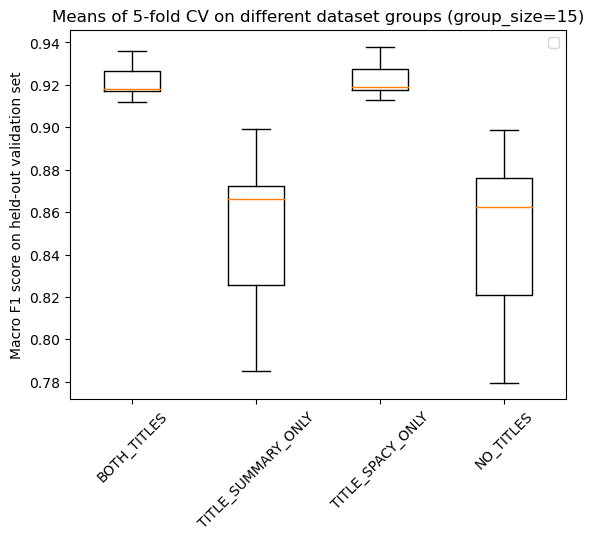

In [88]:
plot_group_means(group_means)

In [89]:
def group_by_decoding(scores):
    groups = {
        decoding: list(filter(lambda s: decoding in s, scores))
        for decoding in ["greedy", "beam", "contrastive", "top_p", "top_k"]
    }
    return groups

In [90]:
decoding_groups = group_by_decoding(bart_large_scores)
decoding_groups

{'greedy': ['train_all_aug.bart_large_cnn.greedy.notitle.subsample_all.spacytitle.json',
  'train_all_aug.bart_large_cnn.greedy.title.subsample_all.spacytitle.json',
  'train_all_aug.bart_large_cnn.greedy.notitle.subsample_unique_text.spacytitle.json',
  'train_all_aug.bart_large_cnn.greedy.notitle.subsample_one_per_source.spacynotitle.json',
  'train_all_aug.bart_large_cnn.greedy.title.subsample_one_per_source.spacynotitle.json',
  'train_all_aug.bart_large_cnn.greedy.title.subsample_all.spacynotitle.json',
  'train_all_aug.bart_large_cnn.greedy.notitle.subsample_one_per_source.spacytitle.json',
  'train_all_aug.bart_large_cnn.greedy.title.subsample_unique_text.spacytitle.json',
  'train_all_aug.bart_large_cnn.greedy.title.subsample_unique_text.spacynotitle.json',
  'train_all_aug.bart_large_cnn.greedy.notitle.subsample_all.spacynotitle.json',
  'train_all_aug.bart_large_cnn.greedy.notitle.subsample_unique_text.spacynotitle.json',
  'train_all_aug.bart_large_cnn.greedy.title.subsample

In [91]:
def plotting_pipeline(path_to_scores: str, filter_scores=lambda _:True, group_by = group_by_title):
    # load all scores
    scores = extract_scores(path_to_scores)

    # filter
    scores = {score_name: score_value for score_name, score_value in scores.items() if filter_scores(score_name)}

    # compute stats
    scores = compute_stats(scores)

    # group
    groups = group_by(scores)

    # extract group means
    group_means = extract_group_means(scores, groups)

    # plot
    plot_group_means(group_means)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Loaded train_all_aug.beam.title.nbeans_10.subsample_unique_text.spacytitle.scores.json
Loaded train_all_aug.top_k.k_640.title.subsample_unique_text.spacynotitle.scores.json
Loaded train_all_aug.top_p.p_0_95.title.subsample_one_per_source.spacytitle.scores.json
Loaded train_all_aug.greedy.title.subsample_all.spacytitle.scores.json
Loaded train_all_aug.greedy.title.subsample_one_per_source.spacytitle.scores.json
Loaded train_all_aug.greedy.notitle.subsample_all.spacytitle.scores.json
Loaded train_all_aug.top_p.p_0_95.notitle.subsample_all.spacytitle.scores.json
Loaded train_all_aug.greedy.notitle.subsample_one_per_source.spacytitle.scores.json
Loaded train_all_aug.top_k.k_640.title.subsample_all.spacytitle.scores.json
Loaded train_all_aug.top_p.p_0_95.notitle.subsample_one_per_source.spacynotitle.scores.json
Loaded train_all_aug.greedy.title.subsample_one_per_source.spacynotitle.scores.json
Loaded train_all_aug.top_p.p_0_95.title.subsample_unique_text.spacytitle.scores.json
Loaded train_

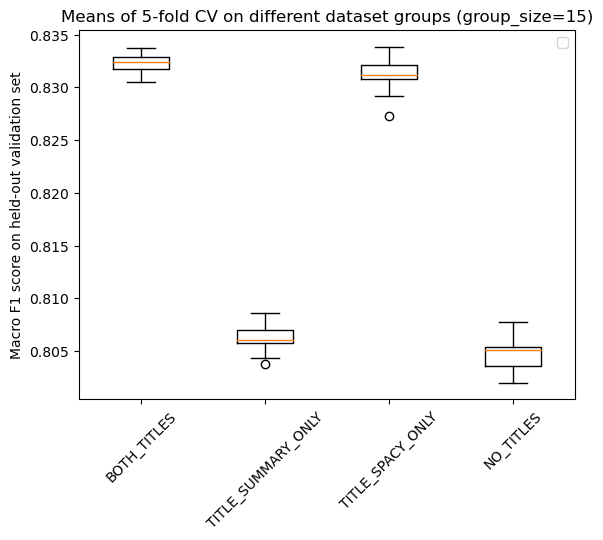

In [92]:
plotting_pipeline("../scores/distilbart_cnn", group_by=group_by_title)

In [93]:
from functools import partial

plot_bart_large_scores = partial(
    plotting_pipeline,
    path_to_scores="../scores/bart-large-cnn"
)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Loaded train_all_aug.bart_large_cnn.greedy.notitle.subsample_all.spacytitle.json
Loaded train_all_aug.bart_large_cnn.beam.title.nbeans_10.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.beam.notitle.nbeans_10.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.contrastive.alpha_0_6.notitle.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_p.p_0_95.title.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.top_p.p_0_95.notitle.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.notitle.subsample_all.spacytitle.json
Loaded train_all_aug.bart_large_cnn.contrastive.alpha_0_6.title.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_all.spacyti

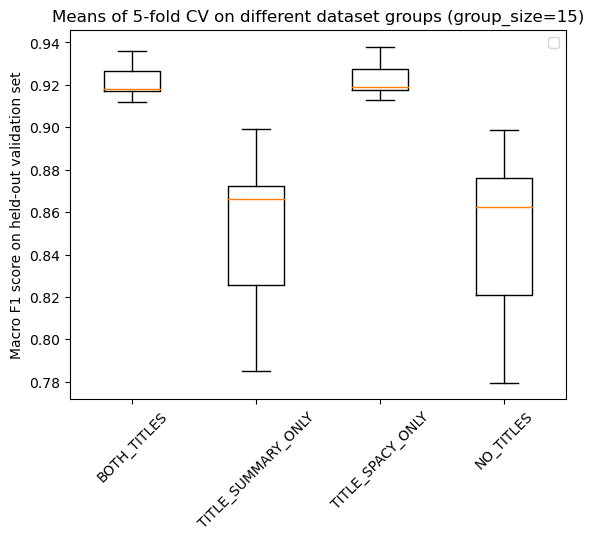

In [94]:
plot_bart_large_scores(group_by=group_by_title)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Loaded train_all_aug.bart_large_cnn.greedy.notitle.subsample_all.spacytitle.json
Loaded train_all_aug.bart_large_cnn.beam.title.nbeans_10.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.beam.notitle.nbeans_10.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.contrastive.alpha_0_6.notitle.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_p.p_0_95.title.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.top_p.p_0_95.notitle.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.notitle.subsample_all.spacytitle.json
Loaded train_all_aug.bart_large_cnn.contrastive.alpha_0_6.title.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_all.spacyti

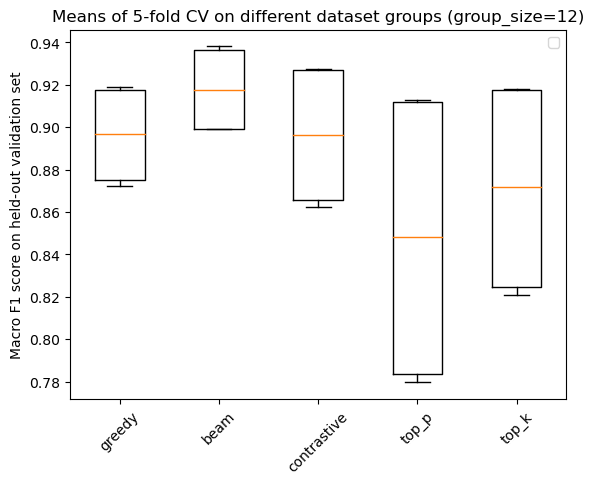

In [95]:
plotting_pipeline("../scores/bart-large-cnn", group_by=group_by_decoding)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Loaded train_all_aug.bart_large_cnn.greedy.notitle.subsample_all.spacytitle.json
Loaded train_all_aug.bart_large_cnn.beam.title.nbeans_10.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.beam.notitle.nbeans_10.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.contrastive.alpha_0_6.notitle.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_p.p_0_95.title.subsample_all.spacynotitle.json
Loaded train_all_aug.bart_large_cnn.top_p.p_0_95.notitle.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.notitle.subsample_all.spacytitle.json
Loaded train_all_aug.bart_large_cnn.contrastive.alpha_0_6.title.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_one_per_source.spacytitle.json
Loaded train_all_aug.bart_large_cnn.top_k.k_640.title.subsample_all.spacyti

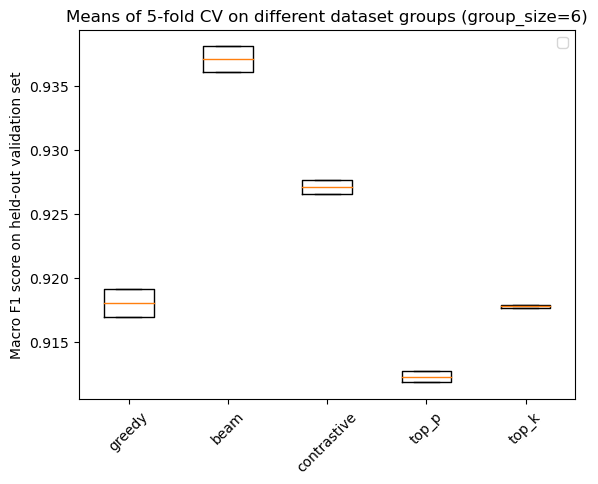

In [96]:
from functools import partial

# filter by "both title" and then group by decoding

def filter_best(s):
    return filters["BOTH_TITLES"](s) or filters["TITLE_SPACY_ONLY"](s)

plot_bart_large_scores(filter_scores=filter_best, group_by=group_by_decoding)